In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import cloveFunctions as clv
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
# matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
import warnings
warnings.filterwarnings('ignore')

In [19]:
import pandas as pd
df = pd.DataFrame({ 'gene':["1 // foo // blabla",
                                   "2 // bar // lalala",
                                   "3 // qux // trilil",
                                   "4 // woz // hohoho",
                                   "nopeynope"], 
                   'cnv':['a','b','c','d','e'],
                   'cell1':[5,9,1,7,9], 
                   'cell2':[12,90,13,87,9],
                   'location':['1', '13.4', '1.1-2', '1.2-p22', '43-q44'],
                  'np_t_w': ['1','13.4','1.1','2','3']})
df['exp'] = ['e','f','g','h','i']
df

cell1  cell2 cnv                gene location np_t_w exp
0      5     12   a  1 // foo // blabla        1      1   e
1      9     90   b  2 // bar // lalala     13.4   13.4   f
2      1     13   c  3 // qux // trilil    1.1-2    1.1   g
3      7     87   d  4 // woz // hohoho  1.2-p22      2   h
4      9      9   e           nopeynope   43-q44      3   i

In [20]:
cnv = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], index=['a', 'b','x'])
exp = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9]], index=['e', 'h','x'])

In [17]:
df[(df['cnv'].isin(cnv.index)) & (df['exp'].isin(exp.index))]

cell1  cell2 cnv                gene location np_t_w exp
0      5     12   a  1 // foo // blabla        1      1   e

In [23]:
results = []
for pddf in [df, cnv, exp]:
    results.append(pddf)

for p in results:
    print(p)


   cell1  cell2 cnv                gene location np_t_w exp
0      5     12   a  1 // foo // blabla        1      1   e
1      9     90   b  2 // bar // lalala     13.4   13.4   f
2      1     13   c  3 // qux // trilil    1.1-2    1.1   g
3      7     87   d  4 // woz // hohoho  1.2-p22      2   h
4      9      9   e           nopeynope   43-q44      3   i
   0  1  2
a  1  2  3
b  4  5  6
x  7  8  9
   0  1  2
e  1  2  3
h  4  5  6
x  7  8  9


In [10]:
df['location'].str.extract('(-)', expand=True)

0
0  NaN
1  NaN
2    -
3    -
4    -

In [16]:
df = pd.DataFrame([['a','b',1,'1p1'],
                  ['a','c',1.9,'1p1'],
                  ['a','d',45,'1p1'],
                  ['a','e',3.9,'1p1'],
                  ['b','c', 2.1,'1p2'],
                  ['b','d',-2,'1p2'],
                  ['b','e',4.1,'1p2'],
                  ['c','b',2,'1p3'],
                  ['c','c',2,'1p3'],
                  ['c','d',2,'1p3'],
                  ['c','e',2,'1p3'],
                  ['d','b',2,'1p4'],
                  ['d','c',2,'1p4'],
                  ['d','d',2,'1p4'],
                  ['d','e',2,'1p4']],
                 columns = ['cnv','exp','np_t_w', 'chromosome'])
df

cnv exp  np_t_w chromosome
0    a   b     1.0        1p1
1    a   c     1.9        1p1
2    a   d    45.0        1p1
3    a   e     3.9        1p1
4    b   c     2.1        1p2
5    b   d    -2.0        1p2
6    b   e     4.1        1p2
7    c   b     2.0        1p3
8    c   c     2.0        1p3
9    c   d     2.0        1p3
10   c   e     2.0        1p3
11   d   b     2.0        1p4
12   d   c     2.0        1p4
13   d   d     2.0        1p4
14   d   e     2.0        1p4

In [32]:
rolling_similarity(df, how='cosine', group='cnv',data='np_t_w')

  chromosome cnv_g0 exp  clove_g0 cnv_g1  clove_g1
0        1p1      a   c       1.9      b       2.1
1        1p1      a   d      45.0      b      -2.0
2        1p1      a   e       3.9      b       4.1
  chromosome cnv_g0 exp  clove_g0 cnv_g1  clove_g1
0        1p1      a   b       1.0      c       2.0
1        1p1      a   c       1.9      c       2.0
2        1p1      a   d      45.0      c       2.0
3        1p1      a   e       3.9      c       2.0
  chromosome cnv_g0 exp  clove_g0 cnv_g1  clove_g1
0        1p1      a   b       1.0      d       2.0
1        1p1      a   c       1.9      d       2.0
2        1p1      a   d      45.0      d       2.0
3        1p1      a   e       3.9      d       2.0
  chromosome cnv_g0 exp  clove_g0 cnv_g1  clove_g1
0        1p2      b   c       2.1      c       2.0
1        1p2      b   d      -2.0      c       2.0
2        1p2      b   e       4.1      c       2.0
  chromosome cnv_g0 exp  clove_g0 cnv_g1  clove_g1
0        1p2      b   c       2

cnv exp    cosine
0   a   b -0.308410
1   a   c  0.572759
2   a   d  0.572759
3   b   c  0.482854
4   b   d  0.482854
5   c   d  1.000000

In [31]:
from scipy.stats import pearsonr
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity

def rolling_similarity(df, group='cnv', partners='exp', data='np_t_w', how='pearson', locus='chromosome'):
    """
    computes similarity between array of data for one gene partners and each successive chromosomal neighbor
    
    :param df: pd df, clove results, sorted in ascending order of chromosome locus
    :param group: str, df column label on which to form gene neigbors, default 'cnv'
    :param members: str, df column label on which to pair partners with gene neighbors, default 'exp'
    :param data: str, df column label of source data to populate arrays, default 'np_t_w' (clove t-stats)
    :param how: str, choice of: {pearson, euclidian, cosine}
    :param align: bool, False compares two arrays which don't necessarily have same gene index
    
    returns pd df of pairs, scores, and chosen similary metric, ordered by locus
    """
    
    unique_genes = df[group].unique()
    df = df[[locus, group, partners, data]].sort_values(by=locus)
    results = []
    for idx, g0 in enumerate(unique_genes):
        if idx < len(unique_genes) - 1:
            for idxk, gk in enumerate(unique_genes[idx+1:]):
                g1 = gk  # unique_genes[idx+1]
                merged = pd.merge(df[df[group] == g0], df[df[group] == g1][[partners,group,data]], how='inner', on=partners)
                merged.columns = [locus,'cnv_g0','exp','clove_g0','cnv_g1','clove_g1']
                print(merged)

                if how == 'pearson':
                    # produces NaN
                    cols = [group, partners, how ,'pval']
                    pear, pval = pearsonr(merged['clove_g0'], merged['clove_g1'])
                    results.append([g0,g1,pear,pval])
                elif how == 'euclidian':
                    cols = [group, partners, how]
                    d = distance.euclidean(merged['clove_g0'], merged['clove_g1'])
                    # error: (offx>=0 && offx<len(x)) failed for 2nd keyword offx: dnrm2:offx=0
                    results.append([g0, g1, d])
                elif how == 'cosine':
                    cols = [group, partners, how]
                    # error: (offx>=0 && offx<len(x)) failed for 2nd keyword offx: dnrm2:offx=0
                    d = cosine_similarity(merged['clove_g0'], merged['clove_g1'])[0][0]  
                    results.append([g0, g1, d])

#     return map_locus(pd.DataFrame(results, columns=cols))
    return pd.DataFrame(results, columns=cols)

In [27]:
df

cell1  cell2 cnv                gene location np_t_w
0      5     12   a  1 // foo // blabla        1      1
1      9     90   b  2 // bar // lalala     13.4   13.4
2      1     13   c  3 // qux // trilil    1.1-2    1.1
3      7     87   d  4 // woz // hohoho  1.2-p22      2
4      9      9   e           nopeynope   43-q44      3

In [13]:
pearsonr?

develop explicit way to define certain combinations of genes on which to compute CLOvEs

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from cloveFunctions import *
import itertools

In [2]:
edf = pd.read_csv('data/breast_mrna.tab.gz', compression='gzip', sep='\t', index_col=0)
cdf = pd.read_csv('data/breast_CCLE_DEL_calls.csv.gz', compression='gzip', index_col=0)

In [3]:
e_samp = edf.index[1:3].values
c_samp = cdf.index[3:5].values

In [4]:
c_samp

array(['A2LD1', 'A2M'], dtype=object)

In [5]:
edf_f, cdf_f = mainFitler(edf, cdf, var=2, n=6, amp_fh=False, dele_fh=False, mut_fh=False, save=False)
df = explicitPairContextStat(edf_f, cdf_f, cnv_lis=c_samp)

attempting 3376 comparisons with current parameters


In [7]:
map_locus(df)

cnv           exp  pos_n  neg_n     pos_mu     neg_mu   pos_var   neg_var  \
0   A2M         AP1S2      6     53   7.319589   7.507049  1.387391  2.894021   
22  A2M         MIEN1      6     53  11.207608  11.165550  2.228997  2.436755   
23  A2M          MLPH      6     53  10.511819  10.505350  5.335603  4.699409   
24  A2M          MREG      6     53   7.900807   7.478374  0.970711  2.610663   
25  A2M          NAT1      6     53   8.542979   8.340457  3.623388  2.661422   
26  A2M          OPN3      6     53   7.683450   8.180795  1.802795  2.257083   
27  A2M         PDCD4      6     53   8.866148   8.602590  3.990745  2.304567   
28  A2M       PLEKHF2      6     53   9.611975   9.099866  0.481288  2.389591   
29  A2M          PLK2      6     53  11.220978  10.387761  0.711472  2.207939   
30  A2M     RAB11FIP1      6     53   8.788833   8.510063  0.573247  2.737802   
31  A2M       RHOBTB3      6     53  10.228904   9.561398  2.652496  2.988565   
32  A2M         RHPN2      6     53   9.985350   8.901847  2.225273  2.340111   
33  A2M          RND3      6     53  11.167418  10.753019  0.959906  2.783227   
34  A2M           SFN      6     53  11.600985  10.404055  4.526207  5.555937   
35  A2M        SH3YL1      6     53  10.493780  10.410062  0.593139  2.342898   
36  A2M       SLC7A11      6     53   7.189081   7.894026  0.786334  2.271289   
37  A2M         SNHG5      6     53  11.823638  11.003988  0.188094  2.192168   
38  A2M        TFAP2A      6     53   8.753469   8.842661  2.342096  2.721972   
21  A2M          MAFF      6     53   8.992966   9.317215  2.160863  3.061501   
39  A2M         TRPS1      6     53   9.751949   8.893529  3.410280  4.139763   
20  A2M  LOC100128822      6     53   9.037838   8.406767  0.668205  2.654896   
18  A2M         IL6ST      6     53   9.011850   8.595864  1.600049  2.008310   
1   A2M           CD9      6     53  11.124205  11.770434  2.169280  1.951835   
2   A2M         CEBPD      6     53   8.758002   8.828830  2.069576  2.236029   
3   A2M         COTL1      6     53   7.759879   9.041548  2.323716  3.839703   
4   A2M       CREB3L4      6     53   9.549590   8.792282  2.026261  4.506132   
5   A2M         CXXC5      6     53   9.995787  10.054935  1.654952  2.144596   
6   A2M        DNAJB4      6     53   7.115043   7.727819  1.058577  2.512182   
7   A2M        DYNLT3      6     53  11.018540  10.428015  0.749428  2.352246   
8   A2M          ELL3      6     53   8.623390   7.836259  2.271842  2.187100   
9   A2M          EXT1      6     53   9.790400   9.814188  2.479797  2.433721   
10  A2M        FAM46A      6     53   7.776968   8.632040  1.593730  2.141067   
11  A2M        FAM69A      6     53   7.526840   7.315498  1.675198  2.601364   
12  A2M         FRMD6      6     53   9.815298   9.603294  2.445011  2.521435   
13  A2M          HES1      6     53   9.347254   8.683709  0.749990  2.610954   
14  A2M     HIST1H2BD      6     53   9.836134   9.143989  1.433637  2.412976   
15  A2M     HIST2H2BE      6     53   8.304559   8.373608  1.962116  2.649944   
16  A2M           ID1      6     53  12.669085  11.676975  0.794355  3.410146   
17  A2M         IKBIP      6     53   6.473131   6.504702  0.632382  2.415719   
19  A2M        KDELR3      6     53   8.161526   9.132145  1.697710  1.914878   
40  A2M       TSPAN13      6     53  12.246213  11.942926  2.374796  2.814186   

    cohens_d      np_t_w    np_p_w  gene_var_exp chromosome  
0  -0.111297   -0.258386  0.797039      2.791326   12p13.31  
22  0.026598   0.0617499  0.950978      2.457440   12p13.31  
23  0.002913  0.00676354  0.994627      4.846250   12p13.31  
24  0.265600    0.616617  0.539942      2.502608   12p13.31  
25  0.119836    0.278212  0.781857      2.810634   12p13.31  
26 -0.328765   -0.763261  0.448455      2.271989   12p13.31  
27  0.164630    0.382205  0.703731      2.525188   12p13.31  
28  0.339707    0.788664  0.433576      2.257751   12p13.31  
29  0.571194     1.32608  0.190101      2.1

In [39]:
df['exp'].value_counts()

SH3YL1          2
RHPN2           2
HIST1H2BD       2
OPN3            2
HIST2H2BE       2
PLEKHF2         2
LOC100128822    2
MLPH            2
PLK2            2
SNHG5           2
NAT1            2
IL6ST           2
TSPAN13         2
CXXC5           2
RND3            2
DYNLT3          2
TRPS1           2
DNAJB4          2
RAB11FIP1       2
COTL1           2
FAM69A          2
MREG            2
IKBIP           2
AP1S2           2
SFN             2
KDELR3          2
RHOBTB3         2
MIEN1           2
CD9             2
FRMD6           2
HES1            2
TFAP2A          2
CEBPD           2
CREB3L4         2
SLC7A11         2
FAM46A          2
ID1             2
EXT1            2
MAFF            2
PDCD4           2
ELL3            2
Name: exp, dtype: int64

In [ ]:
cbar = fig.colorbar

### Subset large intestine data to get to 5 viz bait contexts

large intestine (source of viz dataset) doesn't have enough n-samples with context (probably why these were induced knockouts)"

In [8]:
csv = pd.read_csv('data/large_intestine_CCLE_DEL_calls.csv.gz', compression='gzip', index_col=0)
viz_bait = ['PTTG1', 'BLM','MUS81', 'PTEN', 'KRAS']
csv.loc[viz_bait].sum(axis=1)
# csv[csv['Name'].isin(viz_bait)]

Name
PTTG1    0
BLM      0
MUS81    2
PTEN     1
KRAS     0
dtype: int64

use all ccle cell lines

In [9]:
csv = pd.read_pickle('data/CCLE_DEL_calls.pickle')
viz_bait = ['PTTG1', 'BLM','MUS81', 'PTEN', 'KRAS']
csv = csv.loc[viz_bait].sum(axis=1)
csv.to_pickle('data/CCLE_DEL_calls_viz.pickle')

Name
PTTG1     18
BLM       19
MUS81      9
PTEN     102
KRAS      31
dtype: int64

In [4]:
explicitPairContextStat?

In [10]:
viz = pd.read_csv('data/viz_HCT116_GARP-score.txt.tar.gz',sep='\t', compression='gzip', index_col=0)

In [11]:
del viz['Gene ID']
del viz['Description']
del viz['Unnamed: 10']
viz.set_index('Gene Name', drop=True, inplace=True)
viz

HCT116_BLM  HCT116_MUS81  HCT116_PTEN  HCT116_PWT  HCT116_PTTG1  \
Gene Name                                                                    
WDR11       -0.156363     -0.306122    -0.357102   -0.084159     -0.413263   
OR10A2      -0.055357     -0.109505    -0.077226   -0.070077     -0.127857   
MRPS12      -0.111989     -0.059505    -0.184910   -0.066028     -0.217499   
MPV17L      -0.036167     -0.148610    -0.225790   -0.068753     -0.239617   
TFPI2       -0.180304     -0.315834    -0.387426   -0.190001     -0.292052   
NUDT15      -0.019991     -0.096132    -0.135179   -0.073432     -0.187830   
TRMT1       -0.319461     -0.101908    -0.093429   -0.118008     -0.220807   
PNOC         0.019299     -0.086702    -0.001842   -0.071489     -0.029707   
EVI2B       -0.018433     -0.155776    -0.078900   -0.057902     -0.229445   
HK3         -0.113540     -0.028631    -0.037378   -0.048561     -0.061255   
AGFG1       -0.062630     -0.065336    -0.066164   -0.078525     -0.072538   
NWD1        -0.009786     -0.103427    -0.063180   -0.106628     -0.205123   
CDC25B      -0.092404     -0.103487    -0.166873   -0.048538     -0.184975   
IPO5        -0.208528     -0.340174    -0.262764   -0.246461     -0.319482   
MBTPS2      -0.119571     -0.118791    -0.072304   -0.145386     -0.286578   
ADAMTS6     -0.059571     -0.276760    -0.083523   -0.137765     -0.201081   
C18orf26    -0.055102     -0.074424    -0.111170   -0.082542     -0.142821   
PRDM16      -0.306788     -0.352801    -0.348216   -0.229299     -0.407372   
PCDHA2      -0.104594     -0.034646    -0.062603   -0.053832     -0.177557   
ATM         -0.262931     -0.140271    -0.201735   -0.143126     -0.437028   
RPL10L      -0.085137     -0.066268    -0.109195   -0.124690     -0.151267   
CHCHD3      -0.060896     -0.041845     0.014596   -0.034407     -0.101332   
MTTP        -0.079989     -0.082217    -0.055620   -0.154760     -0.185084   
ZNF322B     -0.036524     -0.062618    -0.035569   -0.057764     -0.096622   
C2orf48     -0.086632     -0.188499    -0.323291   -0.066501     -0.459105   
GYLTL1B     -0.146731     -0.212518    -0.154975   -0.188583     -0.289300   
LILRA1      -0.011010     -0.021937    -0.023797   -0.021817     -0.046927   
SLC7A4      -0.053646     -0.145044    -0.093997   -0.070052     -0.243181   
RTDR1       -0.225225     -0.220668    -0.204138   -0.173961     -0.387981   
SIX4         0.044502     -0.060217    -0.003129   -0.016879     -0.195247   
...               ...           ...          ...         ...           ...   
NR1D2       -0.024320     -0.064596     0.016439   -0.064482     -0.147274   
CRLS1       -0.005607     -0.033849    -0.042858   -0.031634     -0.076191   
LCN2        -0.040824     -0.065197    -0.124370   -0.075300     -0.218833   
SNRNP25     -0.183204     -0.223681    -0.238966   -0.383539     -0.383436   
DHRSX        0.004372     -0.058846    -0.054757   -0.032418     -0.045725   
ATP6V1B1    -0.003800     -0.080463    -0.115551   -0.060708     -0.208611   
ZFYVE19     -0.111935     -0.120309    -0.214380   -0.091961     -0.228895   
CXCL11      -0.037574     -0.029247    -0.064663   -0.051159     -0.069725   
ALDH2       -0.148877     -0.306251    -0.183207   -0.185887     -0.361499   
GPR37       -0.219126     -0.161423    -0.119352   -0.156892     -0.421172   
KIAA1826     0.013196     -0.018099    -0.071359   -0.057302     -0.143625   
SENP7       -0.148134     -0.198555    -0.114743   -0.062903     -0.158433   
CEACAM7     -0.061692     -0.109746    -0.132976   -0.126997     -0.201453   
-           -0.093911     -0.134310    -0.172989   -0.131672     -0.190048   
LGALS2      -0.057834     -0.053017    -0.070173   -0.047023     -0.052493   
FANCL       -0.070033     -0.178037    -0.141973   -0.110448     -0.311022   
GIMAP5      -0.145953     -0.204169    -0.077858   -0.171802     -0.427008   
TCP11L1     -0.191696     -0.279673    -0.208762   -0.248061     -0.453932   
CABYR       -0.008479     -0.0359

## Compute Some Sample Breast CLOvE

In [ ]:
from cloveFunctions import *

def compute_breast_cloves(save=False):
    exp_breast = pd.read_pickle('data/breast_mrna_df.pickle')
    cdel = pd.read_pickle('data/CCLE_DEL_calls.pickle')
    cell = pd.read_pickle('data/ccle_cell_info_df.pickle')

    # this filtering step requires subsetting cdel to tissue of interest (breast)
    cells = list(set(cdel.columns).intersection(exp_breast.columns)) # eliminating all contexts less than 2
    cdel_breast = cdel[cells]
    df=randomPairContextStat(100000, exp_breast, cdel_breast, nan_style='propagate')
    
    if save:
        df.to_csv('data/breast_ttest_real_samp.tab.gz', sep='\t', compression='gzip')
    return df

def load_breast_cloves():
    return  pd.read_csv('data/breast_ttest_real_samp.tab.gz', sep='\t', compression='gzip', index_col=0)

# Compute 1M Sample Breast CLOvE

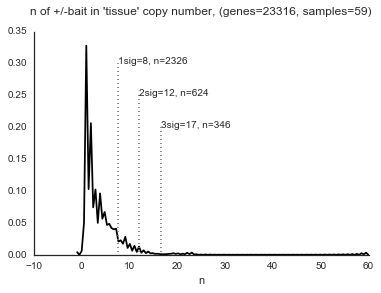

In [2]:
%matplotlib inline
expdf, cnvdf = load_data('data/breast_mrna.tab.gz', 'data/breast_CCLE_DEL_calls.csv.gz')

In [3]:
expdf, cnvdf = mainFitler(expdf, cnvdf, var=2, n=8)

exp: (16237, 59) --> filter --> (1688, 59)
cnv: (23316, 59) --> filter --> (2278, 59)
3845264 CLOvE pairs are possible with these parameters
estimated calculation time: 44.86141333333333min (~7sec/10k pairs)


## Compute Some Sample Breast CLOvE
that match with pre computed cloves from some other set

In [ ]:
def matchPairContextStat(expdf, cnvdf, new_cohort, matchdf, match_cohort, nan_style='omit', permute=False):
    """
    computes clove pairs from one sample that match with those computed in some other cohorts
    
    :param expdf: pandas dataframe, expression by sample 
                    (hopefully filtered with mainFilter, tissue specific, with matching samples in cnv)
    :param cnvdf: pandas dataframe, binarized mask 5(1=delete, 0=nodelete) deletion by sample 
                    (hopefully filtered with mainFilter, tissue specific, with matching samples in exp)
    :param new_cohort: str, identifier for the current cohort computation (eg, tissue origin of exp and cnv)
    :param matchdf: pandas dataframe, results of clove computation performed in other cohort
                    exp and cnv pairs will be used to populate the new clove results so pairs match between cohort
    :param match_cohort: str, identifier for the matching (precomputed) cohort used (eg, tissue origin of matchdf)
    :param nan_style: str, how the stats.ttest_ind treats NANs, {‘propagate’, ‘raise’, ‘omit’}
    :param permute: bool, True will calculate pairs with randomly permuted expression matrix as null model
    
    returns df[['exp', 'cnv', 'cntxt_pos_mu', 'cntxt_neg_mu', 
                'cntxt_pos_var', 'cntxt_neg_var', 
                'cntxt_pos_n', 'cntxt_neg_n']]
    """
    
    cells = list(set(cnvdf.columns).intersection(expdf.columns)) # confirm same samples in both cnv and exp
    expdf = expdf[cells]
    cmask = cnvdf[cells] == 1
    
    df = matchdf[['exp', 'cnv', 'np_t_w', 'np_t_w_null','np_p_w']]
    df.columns = ['exp', 'cnv', 't_'+match_cohort, 't_null_'+match_cohort, 'p_'+match_cohort,]
    
    if permute:
        cmask_n = scrambleDF(cmask)
    
#     only keep elements of matchdf['exp'] that are also in expdf.index
    df = df[(df['exp'].isin(expdf.index)) & (df['cnv'].isin(cnvdf.index))]
    print('attempting {} comparisons referenced from {}'.format(shape.df[0], match_cohort))
    
    np_t_w, np_p_w, np_t_w_null = [], [], []
  
    # progress initialize
    count=0
    percent_complete=0
    comparisons = shape.df[0]
    
    for row in df.itertuples():
        # progress report
        count+=1
        if count%(comparisons/10)==0:
            percent_complete+=10
            print('pair computation {}% complete ({}/{})'.format(percent_complete, count, comparisons))
        
        # mask cnv contexts onto expression data
        pos = np.array(expdf.loc[row.exp][cmask.loc[row.cnv]])
        neg = np.array(expdf.loc[row.exp][~cmask.loc[row.cnv]])
        
        # calculate t_stat, welch
        t, p = stats.ttest_ind(pos, neg, nan_policy=nan_style, equal_var=True)
        
        if permute:
            pos = np.array(expdf.loc[row.exp][cmask_n.loc[row.cnv]])
            neg = np.array(expdf.loc[row.exp][~cmask_n.loc[row.cnv]])
            t, p = stats.ttest_ind(pos, neg, nan_policy=nan_style, equal_var=True)
            np_t_w_null.append(t)
   
    df['t_'+new_cohort] = np_t_w
    df['p_'+new_cohort] = np_p_w
    
    if permute:
        df['t_null_'+new_cohort] = np_t_w_null
        
    return df

## graph distribution of copy numer in LUNG CCLE 

In [2]:
calls = pd.read_pickle('data_large/CCLE_DEL_calls.pickle')
cellinfo = pd.read_pickle('data_large/ccle_cell_info_df.pickle')
lungcnv = pd.read_pickle('data/lung_cnv_df.pickle')
lungexp = pd.read_pickle('data/lung_mrna_df.pickle')

In [3]:
lungexp1, lungcnv1  = clv.ccleTissueSelect(expdf_fn='data/lung_mrna_df.pickle',
                                         cnvdf_fn='data_large/CCLE_DEL_calls.pickle',
                                         celldf_fn='data_large/ccle_cell_info_df.pickle',
                                         tissue='lung', out_dir='data/')

mean:  0.0003419580682746488
std:  0.0004864900226009831


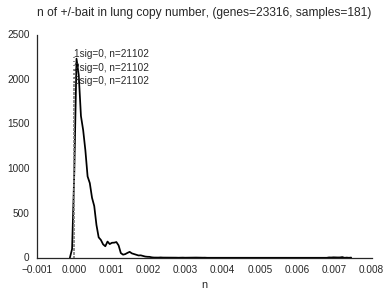

In [4]:
%matplotlib inline
clv.graph_n_ratio(lungcnv1, 'lung', y0=2250, yd=150)

mean:  7.964873906330417
std:  11.298861660411463


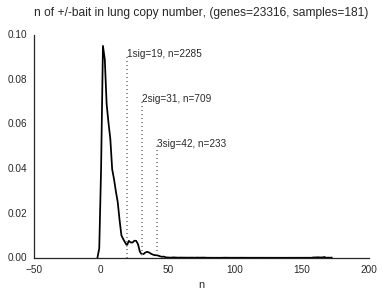

In [9]:
clv.graph_n_dist(lungcnv1, tissue='lung', y0=0.09, yd=0.02)

In [25]:
exp_arr = lungexp.values.flatten()
exp_arr =exp_arr[~np.isnan(exp_arr)]
print('mean: ', np.mean(exp_arr))
print('std: ', np.std(exp_arr))
sns.distplot(exp_arr, hist=False, color='black')
plt.title('lung expression distribition, ccle')


mean:  7.96913214053
std:  2.00143772104


mean:  0.00664955547931
std:  0.455208235057


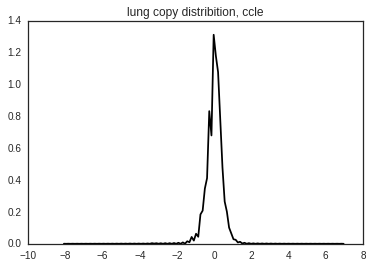

In [24]:
exp_cnv = lungcnv.values.flatten()
exp_cnv =exp_cnv[~np.isnan(exp_cnv)]
print('mean: ', np.mean(exp_cnv))
print('std: ', np.std(exp_cnv))
sns.distplot(exp_cnv, hist=False, color='black')
plt.title('lung copy distribition, ccle')

## compare GISTIC log2 values with REVEALER calls


In [2]:
gistic = pd.read_pickle('data/lung_cnv_df.pickle')
lungexp, reveal = clv.ccleTissueSelect(expdf_fn='data/lung_mrna_df.pickle',
                                         cnvdf_fn='data_large/CCLE_DEL_calls.pickle',
                                         celldf_fn='data_large/ccle_cell_info_df.pickle',
                                         tissue='lung', out_dir='data/')

In [3]:
print(gistic.shape)
gistic.head(1)

(23316, 180)


A549_LUNG  ABC1_LUNG  BEN_LUNG  CAL12T_LUNG  CALU1_LUNG  CALU3_LUNG  \
SYMBOL                                                                        
A1BG       0.4405     0.7541    0.1362      -0.3696     -0.3462      0.3349   

        CALU6_LUNG  CHAGOK1_LUNG  COLO668_LUNG  CORL105_LUNG      ...       \
SYMBOL                                                            ...        
A1BG        0.2393        0.3836       -0.5689        0.3113      ...        

        SKLU1_LUNG  SKMES1_LUNG  SQ1_LUNG  SW1271_LUNG  SW1573_LUNG  \
SYMBOL                                                                
A1BG       -0.0661       0.2115   -0.4725        -0.24      -0.1081   

        SW900_LUNG  T3M10_LUNG  TIG3TD_LUNG  VMRCLCD_LUNG  VMRCLCP_LUNG  
SYMBOL                                                                   
A1BG        0.1534      0.1002       0.0199        -0.192        0.6702  

[1 rows x 180 columns]

In [4]:
print(reveal.shape)
reveal.head(1)

(23316, 181)


HCC366_LUNG  NCIH661_LUNG  NCIH727_LUNG  RERFLCAI_LUNG  NCIH2029_LUNG  \
Name                                                                          
A1BG            0             0             0              0              0   

      DMS273_LUNG  LXF289_LUNG  HS618T_LUNG  NCIH1930_LUNG  IALM_LUNG  \
Name                                                                    
A1BG            0            0            0              0          0   

        ...      NCIH2085_LUNG  NCIH2023_LUNG  NCIH2342_LUNG  NCIH226_LUNG  \
Name    ...                                                                  
A1BG    ...                  0              0              0             0   

      NCIH510_LUNG  NCIH2066_LUNG  NCIH1734_LUNG  LUDLU1_LUNG  NCIH2106_LUNG  \
Name                                                                           
A1BG             0              0              0            0              0   

      SALE_LUNG  
Name             
A1BG          0  

[1 rows x 181 columns]

In [21]:
l = pd.DataFrame(reveal.stack()).reset_index()
l.columns = ['gene','cell','reveler_del']
r = pd.DataFrame(gistic.stack()).reset_index()
r.columns = ['gene','cell','gistic_val']
rev_gis_merge = pd.merge(left=l, right=r, left_on=['gene','cell'], right_on=['gene','cell'])

In [28]:
pal = {0: "gray", 1: "red"}

Ttest_indResult(statistic=1351.1892119949173, pvalue=0.0)


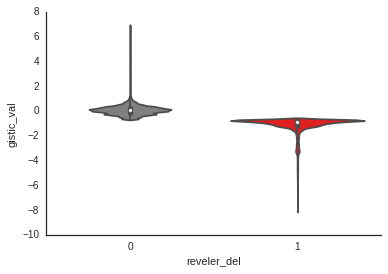

In [31]:
pal = {0: "gray", 1: "red"}

tt = stats.ttest_ind(rev_gis_merge[rev_gis_merge['reveler_del']==0]['gistic_val'],
                rev_gis_merge[rev_gis_merge['reveler_del']==1]['gistic_val'])
print(tt)
%matplotlib inline
sns.set_style('white')
sns.violinplot(data=rev_gis_merge, x='reveler_del', y='gistic_val', palette=pal)
sns.despine()

## Compute Some Sample Lung CLOvE matching pre-computed TCGA values

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
import scipy.stats as stats
from cloveFunctions import *
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
import warnings
warnings.filterwarnings('ignore')

def matchPairContextStat(expdf, cnvdf, new_cohort, matchdf, match_cohort, nan_style='omit', permute=False):
    """
    computes clove pairs from one sample that match with those computed in some other cohorts
    
    :param expdf: pandas dataframe, expression by sample 
                    (hopefully filtered with mainFilter, tissue specific, with matching samples in cnv)
    :param cnvdf: pandas dataframe, binarized mask 5(1=delete, 0=nodelete) deletion by sample 
                    (hopefully filtered with mainFilter, tissue specific, with matching samples in exp)
    :param new_cohort: str, identifier for the current cohort computation (eg, tissue origin of exp and cnv)
    :param matchdf: pandas dataframe, results of clove computation performed in other cohort
                    exp and cnv pairs will be used to populate the new clove results so pairs match between cohort
    :param match_cohort: str, identifier for the matching (precomputed) cohort used (eg, tissue origin of matchdf)
    :param nan_style: str, how the stats.ttest_ind treats NANs, {‘propagate’, ‘raise’, ‘omit’}
    :param permute: bool, True will calculate pairs with randomly permuted expression matrix as null model
    
    returns df[['exp', 'cnv', 'cntxt_pos_mu', 'cntxt_neg_mu', 
                'cntxt_pos_var', 'cntxt_neg_var', 
                'cntxt_pos_n', 'cntxt_neg_n']]
    """
    
    cells = list(set(cnvdf.columns).intersection(expdf.columns)) # confirm same samples in both cnv and exp
    expdf = expdf[cells]
    cmask = cnvdf[cells] == 1
    
    df = matchdf[['exp', 'cnv', 'np_t_w', 'np_t_w_null','np_p_w']]
    df.columns = ['exp', 'cnv', 't_'+match_cohort, 't_null_'+match_cohort, 'p_'+match_cohort,]
    
    if permute:
        cmask_n = scrambleDF(cmask)
    
#     only keep elements of matchdf['exp'] that are also in expdf.index
    df = df[(df['exp'].isin(expdf.index)) & (df['cnv'].isin(cnvdf.index))]
    print('attempting {} comparisons referenced from {}'.format(df.shape[0], match_cohort))
    
    np_t_w, np_p_w, np_t_w_null = [], [], []
  
    # progress initialize
    count=0
    percent_complete=0
    comparisons = df.shape[0]
    
    for row in df.itertuples():
        # progress report
        count+=1
        if count%(comparisons/10)==0:
            print('hiii')
            print(np.array(expdf.loc[row.exp][cmask.loc[row.cnv]]))
            percent_complete+=10
            print('pair computation {}% complete ({}/{})'.format(percent_complete, count, comparisons))
        
        # mask cnv contexts onto expression data
        pos = np.array(expdf.loc[row.exp][cmask.loc[row.cnv]])
        neg = np.array(expdf.loc[row.exp][~cmask.loc[row.cnv]])
        
        # calculate t_stat, welch
        t, p = stats.ttest_ind(pos, neg, nan_policy=nan_style, equal_var=True)
        if type(np_t_w) == np.ma.core.MaskedConstant:
            print('its masked')
            print([pos, neg])
            np_t_w.append(np.nan)
            np_p_w.append(np.nan)
        else:    
            np_t_w.append(t)
            np_p_w.append(p)
        
        if permute:
            pos = np.array(expdf.loc[row.exp][cmask_n.loc[row.cnv]])
            neg = np.array(expdf.loc[row.exp][~cmask_n.loc[row.cnv]])
            t, p = stats.ttest_ind(pos, neg, nan_policy=nan_style, equal_var=True)
            np_t_w_null.append(t)
   
    df['t_'+new_cohort] = np_t_w
    df['p_'+new_cohort] = np_p_w
    
    if permute:
        df['t_null_'+new_cohort] = np_t_w_null
        
    return df, np_t_w

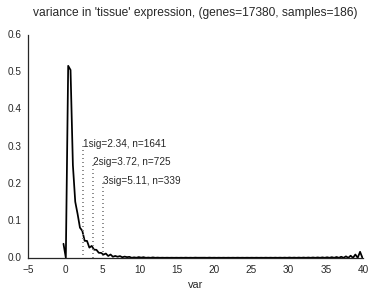

mean:  7.964873906330417
std:  11.298861660411463


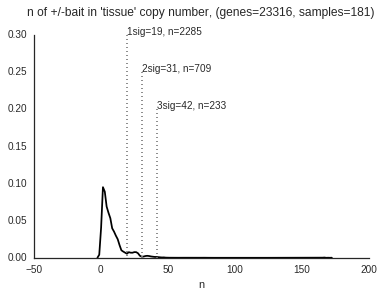

exp: (17380, 186) --> filter --> (2030, 180)
cnv: (23316, 181) --> filter --> (18312, 180)
37173360 CLOvE pairs are possible with these parameters
estimated calculation time: 433.68919999999997min (~7sec/10k pairs)
attempting 50612 comparisons referenced from tcga_lung


In [82]:
# bring in exp and cnv data from
# G:\My Drive\Python Scripts\clove\tissueDF_raw

matchdf = pd.read_csv('data/tcga_lung_cloves.tab.gz', compression='gzip', sep='\t', index_col=0)
%matplotlib inline
lungexp, lungcnv = load_data('data/lung_mrna_df.pickle', 'data/lung_cnv_df.p', details=True)
lungexp, lungcnv = clv.mainFitler(lungexp, lungcnv, var=2, n=2)
lungresults, np_t_w = matchPairContextStat(lungexp, lungcnv, 'ccle_lung', matchdf, 'tcga_lung', nan_style='omit', permute=False)

To Do
Debug matchPairContextStat func in tgca_vs_ccle.ipynb
Add save parameter
Run above func to compute CCLE lung matching pairs in data/tcga_lung_cloves.tab.gz
Write function to Graph Scatter (with 3𝞭 cutoff) 
Graph above func for lung CCLE vs TCGA
Run millions of comparisons in TCGA BRCA
Re-run millions of comparisons in CCLE breast?
If not, use existing CCLE breast cloves to dictate which pairs tested
Run millions of comparisons in TCGA BRCA
Housekeeping
Func load_data created to handle raw input files directly
Relies on Func graph_var_dist and graph_n_dist to display summary stats n and var for use in filtering
TODO add in tissue/cohort subset option
Func matchPairContextStat computes pairs in new data according to pairs defined in old data.  Used to match pair for pair across each cohort
TODO test/debug in ccle_sandbox


In [46]:
print('all done')

all done


In [76]:
lungresults.to_csv('data/tcga_v_ccle_lung.tab.gz', sep='\t', compression='gzip')

In [63]:
lungresults.replace(np.ma.core.MaskedConstant, np.nan)
# lungresults.replace('--',np.nan).dropna()

exp        cnv  t_tcga_lung  t_null_tcga_lung   p_tcga_lung  \
430       FOXH1    METTL2B     0.718796          0.326838  4.724362e-01   
431       FOXH1      MYOM1    -0.898618         -0.719695  3.690744e-01   
432       FOXH1    CCDC148    -0.130872          1.082172  8.959029e-01   
433       FOXH1       IRGQ     0.158604          1.022911  8.740135e-01   
435       FOXH1    DNAJC5B     2.809684         -0.841591  5.056600e-03   
437       FOXH1   CXorf40B     0.353968          0.592757  7.234380e-01   
439       FOXH1  LINC00184    -2.378164          0.948548  1.758783e-02   
440       FOXH1       CHD8     0.984361         -0.155276  3.251783e-01   
441       FOXH1       ITCH     0.879181         -0.664096  3.795160e-01   
443       FOXH1      AP1B1     0.946828          0.820638  3.439574e-01   
444       FOXH1      YIF1B    -0.015980          1.325771  9.872535e-01   
445       FOXH1    MIR1264     0.338710          0.618951  7.349000e-01   
446       FOXH1     TMEM44     0.293237         -1.656117  7.694022e-01   
447       FOXH1  LOC285768     1.204588          0.855159  2.286500e-01   
449       FOXH1      ETHE1     0.164935          1.046626  8.690290e-01   
450       FOXH1   MIR548AL    -0.460933          0.642141  6.449475e-01   
452       FOXH1        BOC    -0.318769         -0.099681  7.499690e-01   
453       FOXH1     NKX2-8     0.928584         -0.114626  3.533307e-01   
455       FOXH1      ORAI2     0.748973          0.529462  4.540514e-01   
456       FOXH1      DAAM2     0.857199          2.438435  3.915423e-01   
462       FOXH1      BTBD9     0.909297          2.454249  3.634143e-01   
464       FOXH1       PGS1    -1.199522          0.161487  2.306117e-01   
467       FOXH1    CEACAM6     0.112163          0.984975  9.107170e-01   
471       FOXH1       E2F3     1.075675          2.294265  2.823346e-01   
473       FOXH1     MRPL33     2.041275          0.663283  4.148796e-02   
475       FOXH1        DAP     2.002822          0.457629  4.546837e-02   
477       FOXH1     INSIG1     0.731722          0.350519  4.645111e-01   
480       FOXH1     ZNF862     0.680582          0.299385  4.962952e-01   
481       FOXH1      MDGA1     0.956025          2.423547  3.392927e-01   
482       FOXH1      VAMP1    -0.399413          0.870700  6.896746e-01   
...         ...        ...          ...               ...           ...   
998909  PCOLCE2     EDDM3B     0.062511          2.915904  9.501686e-01   
998911  PCOLCE2       PRB2     3.935682          1.727515  8.875355e-05   
998912  PCOLCE2    RNF113A     2.252961          0.252131  2.447963e-02   
998913  PCOLCE2     UGT3A2     2.617037          0.234116  9.004749e-03   
998914  PCOLCE2       MAL2     1.886041         -0.241834  5.958161e-02   
999100    EPCAM       CD80    -5.090645          0.456092  4.268979e-07   
999101    EPCAM      TULP1     3.437942         -0.490044  6.105299e-04   
999102    EPCAM   C17orf78     8.853471          0.879954  3.842827e-18   
999103    EPCAM     CLPSL1     3.425672         -0.678801  6.384425e-04   
999104    EPCAM     VPS37B     3.519372          2.328042  4.522280e-04   
999105    EPCAM      MIR96     2.745300         -0.502698  6.154937e-03   
999107    EPCAM    C2orf48     5.014232          0.040092  6.305937e-07   
999109    EPCAM     CYP2W1     1.415329         -0.800050  1.572863e-01   
999110    EPCAM      PRSS1     3.195987          0.424103  1.437599e-03   
999112    EPCAM  WDR86-AS1     2.925008         -0.262016  3.522971e-03   
999114    EPCAM       FRS3     3.220287         -0.456907  1.322279e-03   
999115    EPCAM      LYPD1     5.116367          0.143937  3.739234e-07   
999116    EPCAM   AMMECR1L     5.365770          0.467363  1.003672e-07   
999118    EPCAM      ABCF2     3.037472         -0.108394  2.448183e-03   
999119    EPCAM        CD5     2.415365          1.266088  1.589954e-02   
999120    EPCAM     ZNHIT3     8.899770          0.978589  2.613765e-18   
999122    EPCAM      ZFP92     3.0850

In [80]:
lungresults[lungresults['t_ccle_lung'] == np.ma.core.MaskedConstant]

SyntaxError: invalid syntax (<ipython-input-80-cd924ab46f3a>, line 1)

In [53]:
type(np_t_w[0])

numpy.ma.core.MaskedConstant

In [55]:
lungresults.shape

(50612, 7)

In [61]:
lungresults.dropna().shape

(41696, 7)

In [72]:
sns.jointplot(x='t_ccle_lung', y='t_tcga_lung', data=lungresults)

MaskError: Cannot convert masked element to a Python int.

In [70]:
sns.__version__

'0.7.1'